<a href="https://colab.research.google.com/github/hrahmia/My-Notebooks/blob/main/Measuring_Model_Performance_Setting_Best_Model_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("/content/drive/MyDrive/Lighthouse /telecom_churn_clean.csv", index_col = 0)

In [4]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
df.isna().any()

account_length            False
area_code                 False
international_plan        False
voice_mail_plan           False
number_vmail_messages     False
total_day_minutes         False
total_day_calls           False
total_day_charge          False
total_eve_minutes         False
total_eve_calls           False
total_eve_charge          False
total_night_minutes       False
total_night_calls         False
total_night_charge        False
total_intl_minutes        False
total_intl_calls          False
total_intl_charge         False
customer_service_calls    False
churn                     False
dtype: bool

In [37]:
df.isna().sum().sort_values()

account_length            0
total_intl_charge         0
total_intl_calls          0
total_intl_minutes        0
total_night_charge        0
total_night_calls         0
total_night_minutes       0
total_eve_charge          0
customer_service_calls    0
total_eve_calls           0
total_day_charge          0
total_day_calls           0
total_day_minutes         0
number_vmail_messages     0
voice_mail_plan           0
international_plan        0
area_code                 0
total_eve_minutes         0
churn                     0
dtype: int64

In [15]:
df.dtypes

account_length              int64
area_code                   int64
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                       int64
dtype: object

In [38]:
from sklearn.neighbors import KNeighborsClassifier
X = df[["total_intl_charge", "total_intl_minutes"]].values
y = df['churn'].values

In [21]:
df.shape

(3333, 19)

In [23]:
print(X.shape, y.shape)

(3333, 2) (3333,)


In [24]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)


KNeighborsClassifier()

In [41]:
X_new = np.array([[56.8, 17.5],
[24.4, 24.1],
[50.1, 10.9]])

In [42]:
print(X_new.shape)

(3, 2)


In [43]:
predictions = knn.predict(X_new)
print("Predictions :{}". format(predictions))

Predictions :[0 0 0]


### Measuring Model Performance --> Scoring Models - sclearn score() function

In [57]:
# To measure the model performance, first we need to train it and see its performance in a new data. Thus we will do partition first.
from sklearn.model_selection import train_test_split

In [58]:
# Partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [59]:
# Building Model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.855


###  Setting Best Model Complexity 

1.   Create More than 1 Model
2.   Compare Their Scores(In this case, Accuracies)



In [60]:
# To get find the best compexity, we should run algorithm with different paramters

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,13) # n_neighbors is the parameter here.
for neighbor in neighbors:
  #First get the model
  knn = KNeighborsClassifier(n_neighbors=neighbor)

  #Fit the Model
  knn.fit(X_train, y_train)\

  #Get Scores for each parameter value to get best complexity

  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.7843977711101586, 2: 0.8281183026146592, 3: 0.8092584654950707, 4: 0.8572653236176596, 5: 0.8465495070724389, 6: 0.8572653236176596, 7: 0.8572653236176596, 8: 0.8572653236176596, 9: 0.8572653236176596, 10: 0.8572653236176596, 11: 0.8572653236176596, 12: 0.8572653236176596} 
 {1: 0.762, 2: 0.826, 3: 0.803, 4: 0.855, 5: 0.846, 6: 0.855, 7: 0.851, 8: 0.855, 9: 0.855, 10: 0.855, 11: 0.851, 12: 0.855}


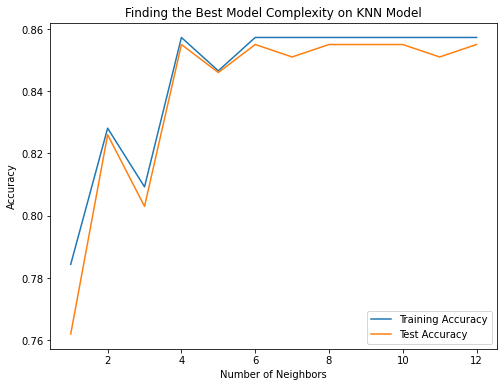

In [61]:
#Plotting to Findout Best Model Complexity

plt.figure(figsize=(8,6))
plt.title("Finding the Best Model Complexity on KNN Model")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy") # Bunlar plotun cizgileri
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy") # Bunlar plotun cizgileri
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()